In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px
import os
import cv2
import pickle
import itertools
# import tensorflow as tf
import pydot
import graphviz

# import keras
# import tensorflow


from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils.vis_utils import plot_model

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
train_path = "C:\\pythonclass\\Students Assignments\\assigmentProject\\Odemosu project UK\\AI project\\Fruit detection data"
test_path = "C:\\pythonclass\\Students Assignments\\assigmentProject\\Odemosu project UK\\AI project\\Fruit detection data"

fresh_apple


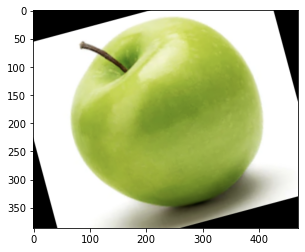

fresh_banana


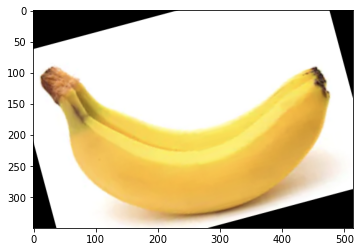

fresh_bitter_gourd


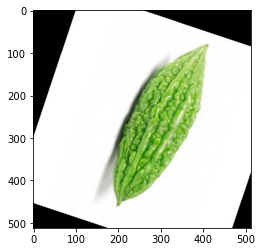

fresh_capsicum


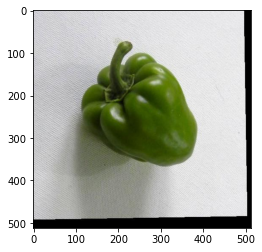

fresh_orange


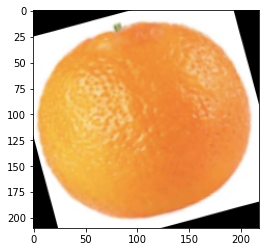

fresh_tomato


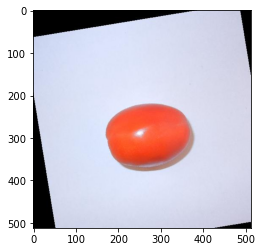

stale_apple


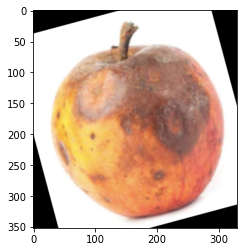

stale_banana


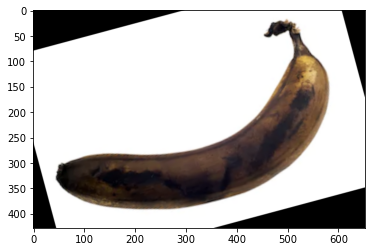

stale_bitter_gourd


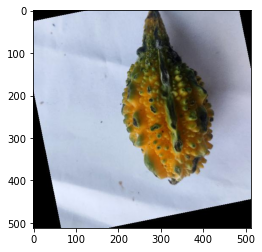

stale_capsicum


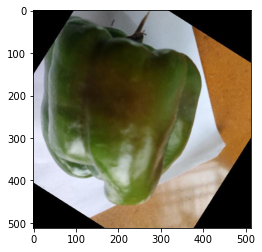

stale_orange


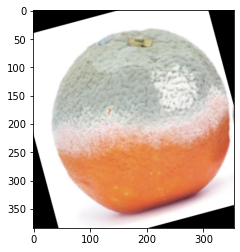

stale_tomato


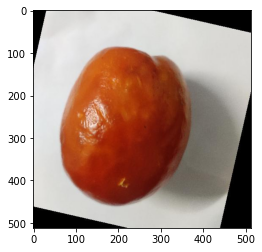

In [4]:
for folder in os.listdir(test_path):
  sub_path = train_path +'/'+ folder

  print(folder)
  for i in range(1):
    temp_path = os.listdir(sub_path)[1]
    temp_path = sub_path +'/'+ temp_path
    img = mpimg.imread(temp_path)
    implot = plt.imshow(img)
    plt.show()

In [5]:
def imagearray(path, size):
  data = []
  for folder in os.listdir(path):
    sub_path = path + "/" + folder

    for img in os.listdir(sub_path):
      image_path = sub_path + "/" + img
      img_arr = cv2.imread(image_path)
      img_arr = cv2.resize(img_arr, size)
      data.append(img_arr)
  return data

In [6]:
size = (250, 250)

In [7]:
train = imagearray(train_path, size)

In [13]:
images = np.array(train)
# x_test = np.array(test)

In [14]:
images = images/255

In [ ]:
print("x_train_shape", images.shape)

In [15]:
def data_class(data_path, size, class_mode):
  datagen = ImageDataGenerator(rescale = 1./255)
  classes = datagen.flow_from_directory(data_path,
                                        target_size = size,
                                        batch_size = 32,
                                        class_mode = class_mode)
  return classes

In [16]:
train_class = data_class(train_path, size, 'sparse')

Found 14682 images belonging to 12 classes.


In [17]:
labels = train_class.classes

In [18]:
train_class.classes

array([ 0,  0,  0, ..., 11, 11, 11])

In [19]:
train_class.class_indices

{'fresh_apple': 0,
 'fresh_banana': 1,
 'fresh_bitter_gourd': 2,
 'fresh_capsicum': 3,
 'fresh_orange': 4,
 'fresh_tomato': 5,
 'stale_apple': 6,
 'stale_banana': 7,
 'stale_bitter_gourd': 8,
 'stale_capsicum': 9,
 'stale_orange': 10,
 'stale_tomato': 11}

In [20]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 1234)

In [21]:
print("y_train_shape", y_train.shape,
      "x_train_shape", x_train.shape,
      "y_test_shape", y_test.shape,
      "x_test_shape", x_test.shape)

y_train_shape (11745,) x_train_shape (11745, 250, 250, 3) y_test_shape (2937,) x_test_shape (2937, 250, 250, 3)


In [22]:
y_train = to_categorical(y_train, num_classes = 12)
y_test = to_categorical(y_test, num_classes = 12)

# **VGG19 Model**

In [ ]:
vgg = VGG19(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False)

44441600/80134624 [===============>..............] - ETA: 1:22

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
num_classes = 12

x = Flatten()(vgg.output)
prediction = Dense(num_classes, activation = 'sigmoid')(x)

In [ ]:
model = Model(inputs = vgg.input, outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

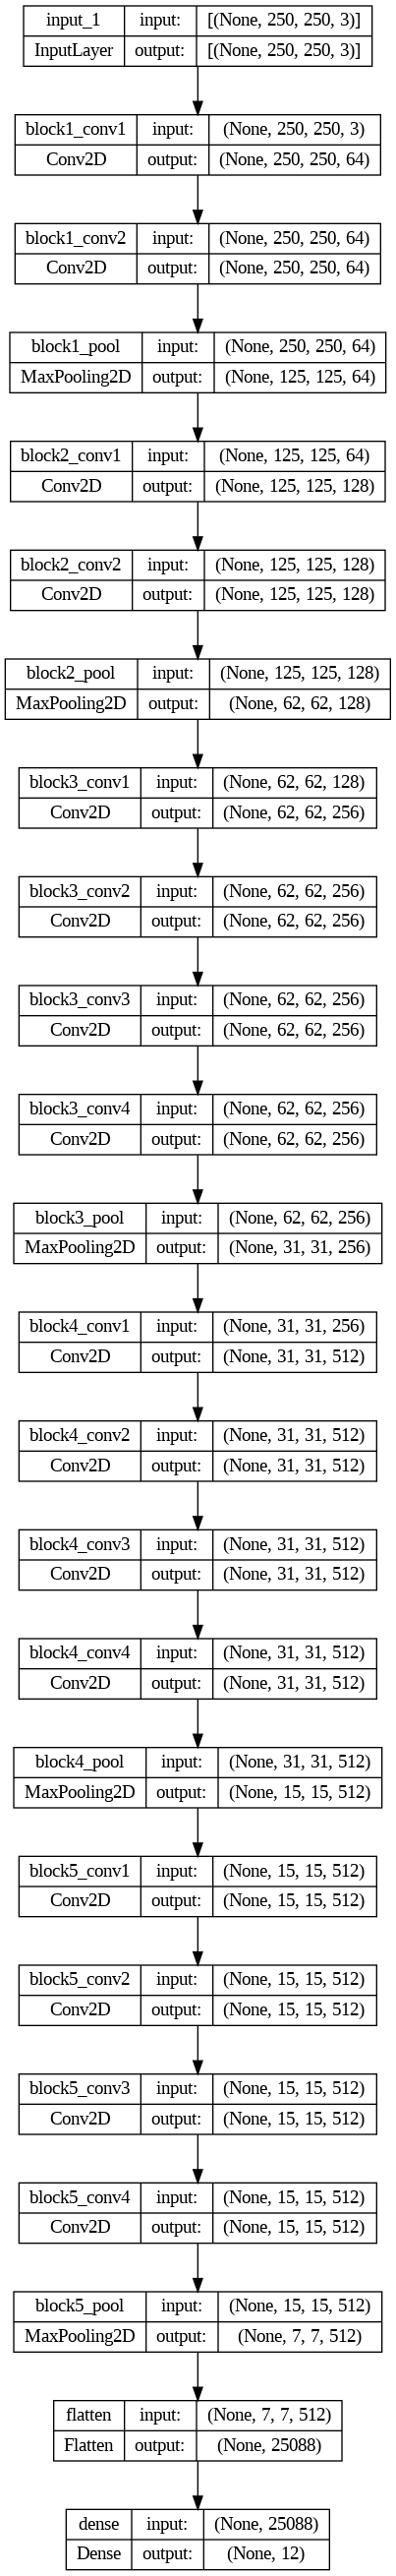

In [ ]:
plot_model(model = model, show_shapes = True)

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_split = 0.1, epochs = 50, callbacks = [early_stop], batch_size = 10, shuffle = True)

Epoch 1/50
1059/1059 [==============================] - 27s 16ms/step - loss: 0.1646 - accuracy: 0.6810 - val_loss: 0.1492 - val_accuracy: 0.7239
Epoch 2/50
1059/1059 [==============================] - 15s 14ms/step - loss: 0.0993 - accuracy: 0.8277 - val_loss: 0.1349 - val_accuracy: 0.7545
Epoch 3/50
1059/1059 [==============================] - 15s 14ms/step - loss: 0.0775 - accuracy: 0.8678 - val_loss: 0.1161 - val_accuracy: 0.7944
Epoch 4/50
1059/1059 [==============================] - 15s 14ms/step - loss: 0.0695 - accuracy: 0.8905 - val_loss: 0.1422 - val_accuracy: 0.8037
Epoch 5/50
1059/1059 [==============================] - 15s 14ms/step - loss: 0.0563 - accuracy: 0.9112 - val_loss: 0.1391 - val_accuracy: 0.8173
Epoch 6/50
1059/1059 [==============================] - 15s 14ms/step - loss: 0.0487 - accuracy: 0.9255 - val_loss: 0.1636 - val_accuracy: 0.8148
Epoch 7/50
1059/1059 [==============================] - 15s 14ms/step - loss: 0.0454 - accuracy: 0.9379 - val_loss: 0.1434 -

# **Accuracy** **Test**   

**Visualization**

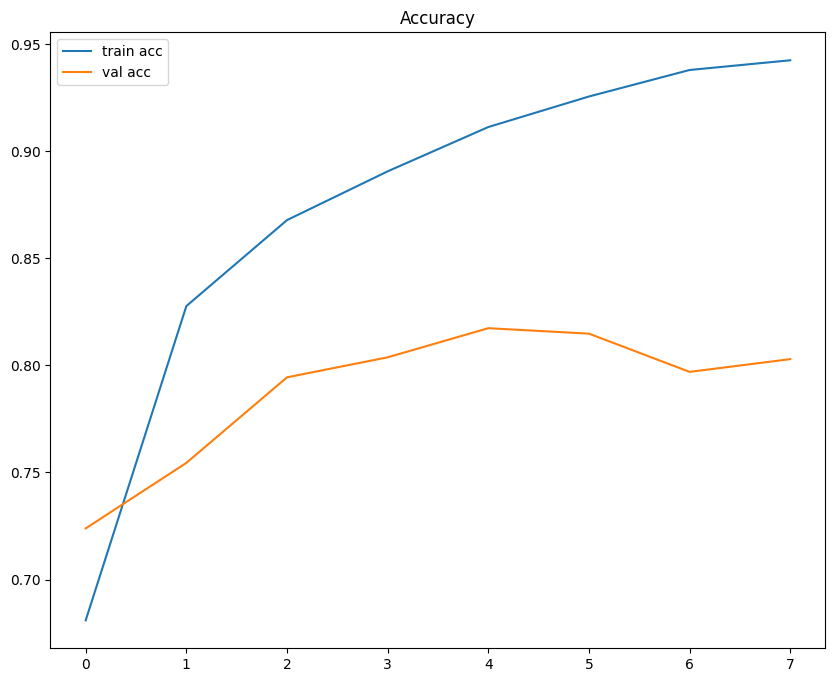

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

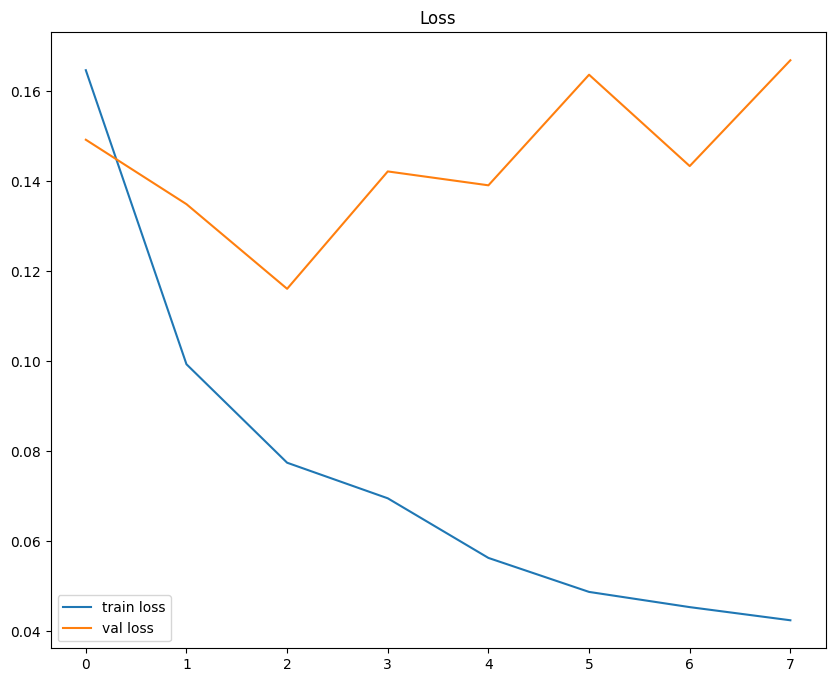

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

# **Model Evaluation**

In [ ]:
model.evaluate(x_test, y_test, batch_size=32)

92/92 [==============================] - 5s 41ms/step - loss: 0.1591 - accuracy: 0.8188


[0.15914709866046906, 0.8188307285308838]

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_train, y_train, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("model.h5")

368/368 [==============================] - 13s 34ms/step - loss: 0.0588 - accuracy: 0.9215
Validation: accuracy = 0.921469  ;  loss_v = 0.058760
Test: accuracy = 0.818831  ;  loss = 0.159147


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# load your test data and the predictions of the CNN model
y_pred = model.predict(x_test) # shape: (num_samples,)

# convert probabilities to class labels (0 or 1) based on a threshold of 0.5
y_pred = np.round(y_pred).astype(int)

# calculate precision, recall, and F1 score
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='samples')

# print the results
print('Precision:', precision)
print('Sensitivity:', recall)
print('F1 score:', f1_score)

92/92 [==============================] - 3s 31ms/step
Precision: 0.7358372988896441
Sensitivity: 0.7634262406526172
F1 score: 0.7450147292091547


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


92/92 [==============================] - 3s 30ms/step


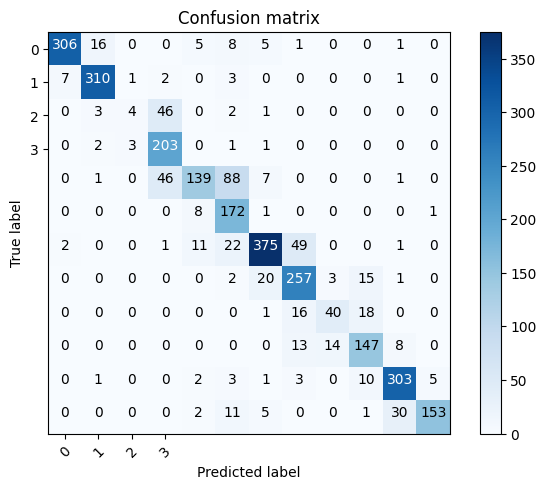

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(4))

# **VGG16 Model**

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(250,250,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=12, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
history = model.fit(x_train, y_train, validation_split = 0.1, epochs = 50, callbacks = [early_stop], batch_size = 10, shuffle = True)